In [ ]:
pip install torch torchvision transformers pillow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Extracted Features Shape: torch.Size([25088])


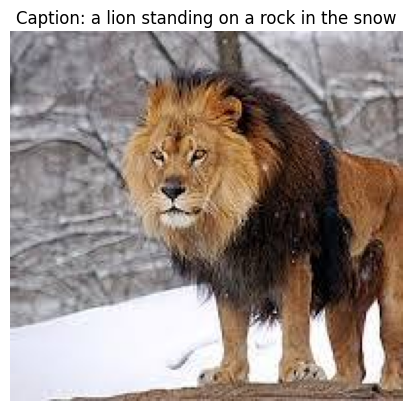

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt

def extract_image_features(image_path, model_name='vgg16'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = {
        'vgg16': models.vgg16(pretrained=True).features.eval().to(device),
        'resnet50': models.resnet50(pretrained=True).to(device)
    }.get(model_name)

    if not model:
        raise ValueError("Select 'vgg16' or 'resnet50'")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        features = model(image).flatten() if model_name == 'vgg16' else model(image)

    return features.cpu()

def create_image_caption(image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt").to(device)

    with torch.no_grad():
        output = model.generate(**inputs)

    return processor.batch_decode(output, skip_special_tokens=True)[0]

def show_image_with_caption(image_path):
    caption = create_image_caption(image_path)
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Caption: {caption}")
    plt.show()

image_path = r"/content/dd.jpeg"
features = extract_image_features(image_path, model_name='vgg16')
print("Extracted Features Shape:", features.shape)
show_image_with_caption(image_path)